# Exploring the User-Recipe rating data and the Recipe-Ingredients data

In [1]:
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import pandas as pd
import numpy as np
from dask_ml.decomposition import PCA
from dask_ml.cluster import KMeans
import pickle
#import umap.umap_ as umap

In [2]:
pp_recipes = dd.read_csv('data/PP_recipes.csv')
raw_recipes = dd.read_csv('data/RAW_recipes.csv')
pp_users = dd.read_csv('data/PP_users.csv')
raw_inter = dd.read_csv('data/RAW_interactions.csv')
inter_train = dd.read_csv('data/interactions_train.csv')
with open('data/ingr_map.pkl', 'rb') as handle:
    ingr_map = pickle.load(handle)

## Exploring Recipes

In [7]:
print("Length of the pp_recipes:", len(pp_recipes))
pp_recipes.head()

Length of the pp_recipes: 178265


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [8]:
print("Length of the raw_recipes", len(raw_recipes))
raw_recipes.head()

Length of the raw_recipes 231637


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [9]:
print("Length of ingr_map", len(ingr_map))
ingr_map.head()

Length of ingr_map 11659


,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308


NOTE: The ingr_map had processed all the ingredients and tokenized them to a more concise label

### Top 20 most common tokenized ingredients

In [10]:
ingr_map.sort_values(by = ['count'], ascending = False).drop_duplicates(subset = ['replaced']).head(20)

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
904,salt,1,salt,4,salt,72848,6270
6657,butter flavor crisco,3,butter,6,butter,48039,840
10969,egg,1,egg,3,egg,43350,2499
10567,durkee onions,2,onion,5,onion,42631,5010
11018,sugar,1,sugar,5,sugar,37464,6906
553,chili-flavored olive oil,3,chili olive oil,15,olive oil,34402,5006
9090,garlic cloves,2,garlic clove,12,garlic clove,29815,3203
10946,water,1,water,5,water,28592,7655
6068,nonfat milk,2,milk,4,milk,24114,4717
4754,flour,1,flmy,4,flmy,23078,2683


### Top 20 least common tokenized ingredients

In [7]:
ingr_map.sort_values(by = ['count'], ascending = True).drop_duplicates(subset = ['replaced']).head(20)

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
3883,goat milk yogurt,3,goat milk yogurt,16,goat milk yogurt,2,3297
8732,jeera seeds,2,jeera seed,10,jeera seed,2,3977
3755,fresh grape leaves,3,fresh grape leaf,16,fresh grape leaf,2,2812
3754,dried cranberry beans,3,dried cranberry bean,20,dried cranberry bean,2,2252
3753,low-carbohydrate baking mix,3,ohydrate baking mix,19,ohydrate baking mix,2,4986
3752,tangerine juice concentrate,3,tangerine juice concentrate,27,tangerine juice concentrate,2,7085
3733,onion soup base,3,onion soup base,15,onion soup base,2,5032
3728,grape juice concentrate,3,grape juice concentrate,23,grape juice concentrate,2,3363
3710,"pomegranate, seeds of",3,"pomegranate, seeds of",21,"pomegranate, seeds of",2,5544
3702,hot pepper relish,3,hot pepper relish,17,hot pepper relish,2,3799


## Exploring users and user-recipe interactions

In [8]:
print("Length of pp_users", len(pp_users))
pp_users.head()

Length of pp_users 25076


,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [20]:
print("Length of raw_interactions", len(raw_inter))
raw_inter.head()

Length of raw_interactions 1132367


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [50]:
print("Lenth of interactions_train", len(inter_train))
inter_train.head()

Lenth of interactions_train 698901


,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


### Plotting distribution of the number of ratings per user

In [4]:
import matplotlib.pyplot as plt
import ast
plt.rcParams["figure.figsize"] = (8,6)

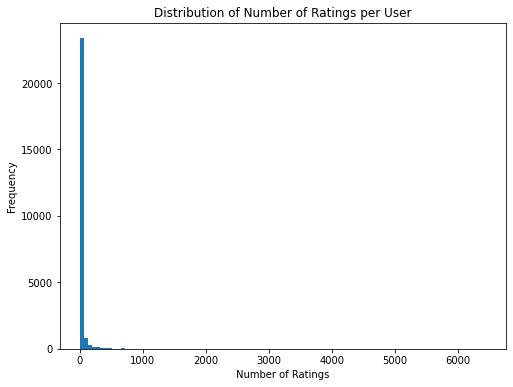

count    25076.000000
mean        27.871311
std        122.729039
min          2.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       6437.000000
dtype: float64

In [12]:
n_ratings = np.asarray(pp_users['n_ratings'])
plt.hist(n_ratings, bins = 100)
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()
n_ratings = dd.from_array(n_ratings)
n_ratings.describe().compute()

Data summary when throwing out users that rated less than or equal to 100 recipes and at least 4 recipes

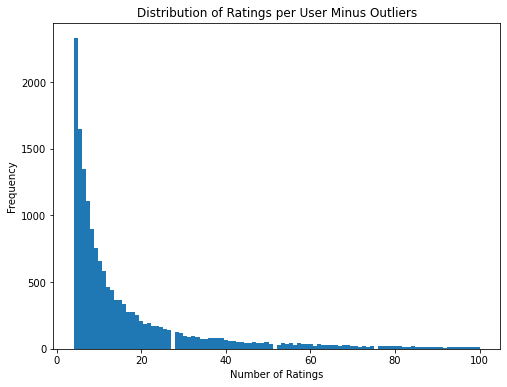

count    16238.000000
mean        16.711541
std         17.771352
min          4.000000
25%          6.000000
50%         10.000000
75%         20.000000
max        100.000000
dtype: float64

In [52]:
pp_users_cut = pp_users[(pp_users['n_ratings'] <= 100) & (pp_users['n_ratings'] >= 4)]
n_ratings = np.asarray(pp_users_cut['n_ratings'])
plt.hist(n_ratings, bins = 100)
plt.title("Distribution of Ratings per User Minus Outliers")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()
n_ratings = dd.from_array(n_ratings)
n_ratings.describe().compute()

### Plotting distribution of the mean rating per user

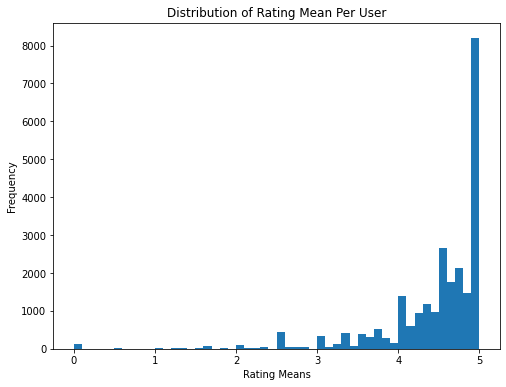

count    25076.000000
mean         4.451941
std          0.723825
min          0.000000
25%          4.250000
50%          4.666667
75%          5.000000
max          5.000000
dtype: float64

In [13]:
ratings = list(pp_users['ratings'])
ratings = [ast.literal_eval(x) for x in ratings]
rating_means = np.asarray([np.mean(x) for x in ratings])
plt.hist(rating_means, bins = 50)
plt.title("Distribution of Rating Mean Per User")
plt.xlabel("Rating Means")
plt.ylabel("Frequency")
plt.show()
rating_means = dd.from_array(rating_means)
rating_means.describe().compute()

Data summary when throwing out users who had an average rating less than 2.5

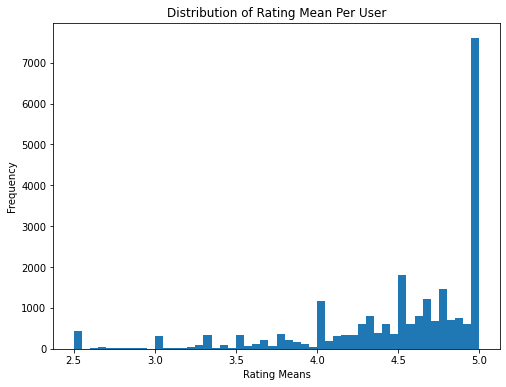

count    24589.000000
mean         4.514601
std          0.563590
min          2.500000
25%          4.285714
50%          4.666667
75%          5.000000
max          5.000000
dtype: float64

In [36]:
ratings = list(pp_users['ratings'])
ratings = [ast.literal_eval(x) for x in ratings]
rating_means = np.asarray([np.mean(x) for x in ratings])
rating_means = rating_means[rating_means >= 2.5]
plt.hist(rating_means, bins = 50)
plt.title("Distribution of Rating Mean Per User")
plt.xlabel("Rating Means")
plt.ylabel("Frequency")
plt.show()
rating_means = dd.from_array(rating_means)
rating_means.describe().compute()

### Plotting distribution of number ratings per recipe

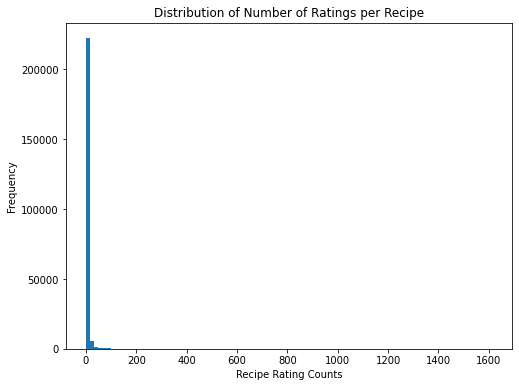

count    231637.000000
mean          4.888541
std          17.532481
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1613.000000
dtype: float64

In [26]:
recipe_rating_counts = raw_inter.groupby(by = ['recipe_id']).size().compute()
plt.hist(recipe_rating_counts, bins = 100)
plt.title("Distribution of Number of Ratings per Recipe")
plt.xlabel("Recipe Rating Counts")
plt.ylabel("Frequency")
plt.show()
recipe_rating_counts = dd.from_array(recipe_rating_counts)
recipe_rating_counts.describe().compute()

Data summary when throwing out recipes with more than 40 ratings and at least 4 ratings per recipe

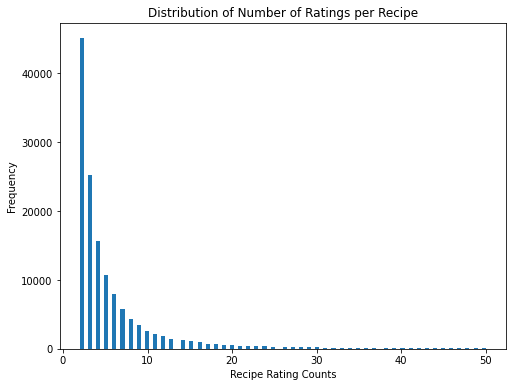

count    137586.000000
mean          5.716439
std           6.309398
min           2.000000
25%           2.000000
50%           3.000000
75%           7.000000
max          50.000000
dtype: float64

In [48]:
recipe_rating_counts = raw_inter.groupby(by = ['recipe_id']).size().compute()
recipe_rating_counts = recipe_rating_counts[(recipe_rating_counts <= 50) & (recipe_rating_counts >= 2)]
plt.hist(recipe_rating_counts, bins = 100)
plt.title("Distribution of Number of Ratings per Recipe")
plt.xlabel("Recipe Rating Counts")
plt.ylabel("Frequency")
plt.show()
recipe_rating_counts = dd.from_array(recipe_rating_counts)
recipe_rating_counts.describe().compute()

### Plotting distribution of mean ratings per recipe

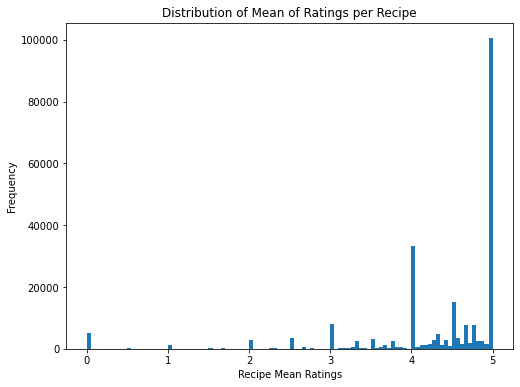

count    231637.000000
mean          4.346246
std           0.990806
min           0.000000
25%           4.000000
50%           4.833333
75%           5.000000
max           5.000000
dtype: float64

In [22]:
recipe_rating_means = raw_inter.groupby(by = ['recipe_id'])['rating'].mean().compute()
plt.hist(recipe_rating_means, bins = 100)
plt.title("Distribution of Mean of Ratings per Recipe")
plt.xlabel("Recipe Mean Ratings")
plt.ylabel("Frequency")
plt.show()
recipe_rating_means = dd.from_array(recipe_rating_means)
recipe_rating_means.describe().compute()

Data summary when throwing out recipes that have a mean rating less than 2.5

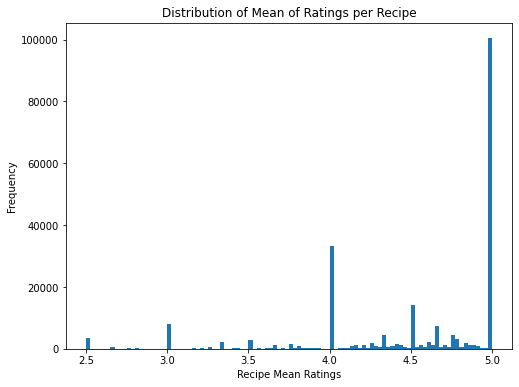

count    220934.000000
mean          4.514082
std           0.616168
min           2.500000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
dtype: float64

In [58]:
recipe_rating_means = raw_inter.groupby(by = ['recipe_id'])['rating'].mean().compute()
recipe_rating_means = recipe_rating_means[recipe_rating_means >= 2.5]
plt.hist(recipe_rating_means, bins = 100)
plt.title("Distribution of Mean of Ratings per Recipe")
plt.xlabel("Recipe Mean Ratings")
plt.ylabel("Frequency")
plt.show()
recipe_rating_means = dd.from_array(recipe_rating_means)
recipe_rating_means.describe().compute()

## Some EDA of the interactions_train dataset: Distribution of ratings per user

In [33]:
print("The total amount of user-recipe ratings in train", len(inter_train))
print("The total amount of users in the user-recipe ratings train", len(inter_train.drop_duplicates(subset = ['user_id'])))
print("The total amount of recipes in the user-recipe ratings train", len(inter_train.drop_duplicates(subset = ['recipe_id'])))

The total amount of user-recipe ratings in train 698901
The total amount of users in the user-recipe ratings train 25076
The total amount of recipes in the user-recipe ratings train 160901


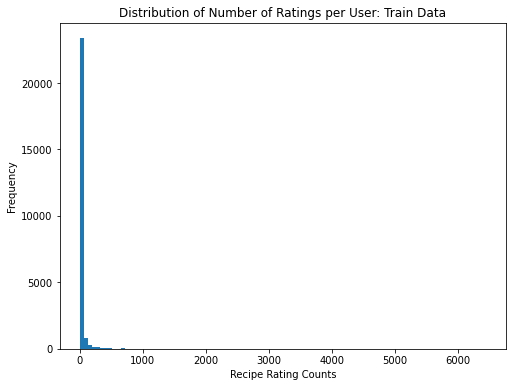

count    25076.000000
mean        27.871311
std        122.729039
min          2.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       6437.000000
dtype: float64

In [5]:
user_rating_counts = inter_train.groupby(by = ['user_id']).size().compute()
plt.hist(user_rating_counts, bins = 100)
plt.title("Distribution of Number of Ratings per User: Train Data")
plt.xlabel("Recipe Rating Counts")
plt.ylabel("Frequency")
plt.show()
user_rating_counts = dd.from_array(user_rating_counts)
user_rating_counts.describe().compute()

The interactions_train dataset is the same as the pp_uses, but the pp_users is just more organized

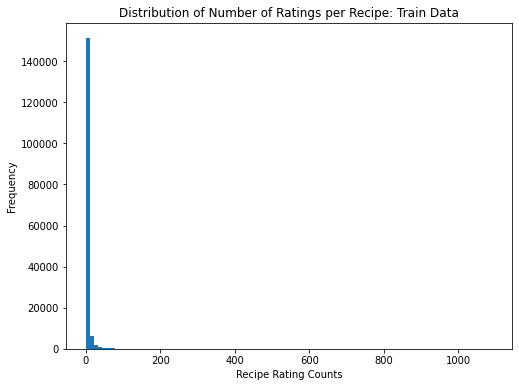

count    160901.000000
mean          4.343671
std          13.421461
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max        1091.000000
dtype: float64

In [35]:
recipe_rate_counts = inter_train.groupby(by = ['recipe_id']).size().compute()
plt.hist(recipe_rate_counts, bins = 100)
plt.title("Distribution of Number of Ratings per Recipe: Train Data")
plt.xlabel("Recipe Rating Counts")
plt.ylabel("Frequency")
plt.show()
recipe_rate_counts = dd.from_array(recipe_rate_counts)
recipe_rate_counts.describe().compute()

In [42]:
train_ratings = np.asarray(inter_train['rating'])
recipe_ratings_train = dd.from_array(train_ratings)
recipe_ratings_train.describe().compute()

count    698901.000000
mean          4.574090
std           0.959022
min           0.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
dtype: float64

### Exploring how much of the raw_interactions dataset gets preserved when I throw out what I want to throw out

In [44]:
raw_ratings = np.asarray(raw_inter['rating'])
raw_ratings = dd.from_array(raw_ratings)
raw_ratings.describe().compute()

count    1.071520e+06
mean     4.661499e+00
std      7.230534e-01
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
dtype: float64

What I will throw out ...

(1) Users that rated more than 100 recipes and less than 4

(2) Users that had an average rating of less than 2.5

(3) Recipes that had greater the 50 ratings and less than 2

(4) Recipes that had an average rating less than 2.5

In [45]:
raw_inter = raw_inter[(raw_inter['rating'] != 0)]
user_rating_counts = raw_inter.groupby(by = ['user_id']).size().compute()
user_rating_means = raw_inter.groupby(by = ['user_id'])['rating'].mean().compute()
recipe_rating_counts = raw_inter.groupby(by = ['recipe_id']).size().compute()
recipe_rating_means = raw_inter.groupby(by = ['recipe_id'])['rating'].mean().compute()

First looking at the total amount of users, total amount of recipes, and total interactions in the user-recipe rating dataset

In [46]:
print("The total amount of user-recipe ratings (no zeros)", len(raw_inter))
print("The total amount of users in the user-recipe ratings", len(raw_inter.drop_duplicates(subset = ['user_id'])))
print("The total amount of recipes in the user-recipe ratings", len(raw_inter.drop_duplicates(subset = ['recipe_id'])))

The total amount of user-recipe ratings (no zeros) 1071520
The total amount of users in the user-recipe ratings 196098
The total amount of recipes in the user-recipe ratings 226590


Examining how much the raw interactions dataset get preserved when throwing out data

In [39]:
good_users1 = user_rating_counts[(user_rating_counts <= 100) & (user_rating_counts >= 4)]
good_users2 = user_rating_means[user_rating_means >= 2.5]
good_users = good_users1.index.intersection(good_users2.index)
good_user_ids = [user_id for user_id in good_users]

good_recipes1 = recipe_rating_counts[(recipe_rating_counts <= 50) & (recipe_rating_counts >= 2)]
good_recipes2 = recipe_rating_means[recipe_rating_means >= 2.5]
good_recipes = good_recipes1.index.intersection(good_recipes2.index)
good_recipe_ids = [recipe_id for recipe_id in good_recipes]

raw_inter_cleaned = raw_inter[(raw_inter['user_id'].isin(good_user_ids)) & (raw_inter['recipe_id'].isin(good_recipe_ids))]

print("The total amount of clean user-recipe ratings", len(raw_inter_cleaned))
print("The total amount of clean users in the user-recipe ratings", len(raw_inter_cleaned.drop_duplicates(subset = ['user_id'])))
print("The total amount of clean recipes in the user-recipe ratings", len(raw_inter_cleaned.drop_duplicates(subset = ['recipe_id'])))

The total amount of clean user-recipe ratings 233683
The total amount of clean users in the user-recipe ratings 25205
The total amount of clean recipes in the user-recipe ratings 84268


In [47]:
raw_inter_cleaned.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
11,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...
14,1171894,134728,2009-04-21,5,MMMMM! This is so good! I actually soaked the ...
18,217118,200236,2008-04-18,5,This was a lovely Morrocan style dish. I halve...
